In [5]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(1, '/viscam/projects/audio_nerf/transfer/audio_nerf/src')
import preprocess
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline
sys.path.insert(1, '/viscam/projects/audio_nerf/transfer/audio_nerf/riffusion-inference')
from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_params import SpectrogramParams
from riffusion.riffusion_pipeline import RiffusionPipeline
from riffusion.datatypes import InferenceInput
pipe = RiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1")
pipe = pipe.to("cuda")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [6]:
ref_data = np.load("/viscam/projects/audio_nerf/transfer/audio_nerf/data/processed_6s/reference.npy", mmap_mode='r')
im_data = np.load("/viscam/projects/audio_nerf/transfer/audio_nerf/data/processed_6s/imitations.npy", mmap_mode='r')
Audio(im_data[1003], rate=44100)

In [7]:
init_image, max_value = preprocess.waveform_to_image(im_data[1003])
mask_image = init_image

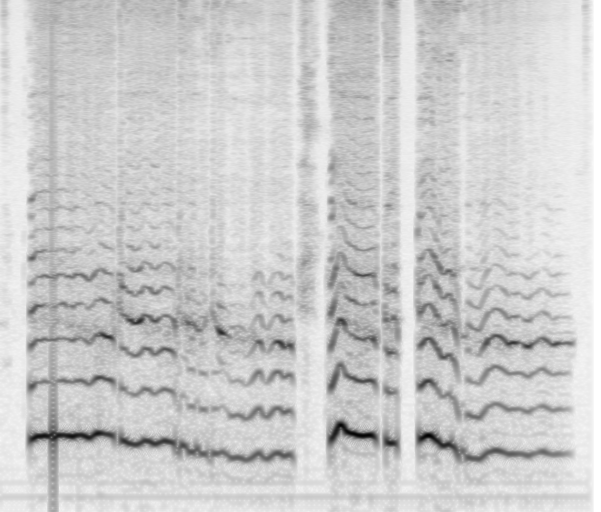

In [11]:
init_image

In [10]:
image = pipe.riffuse_mason("Turn this vocally imitated sound into a trumpet",
                           init_image=init_image,
                           mask_image = mask_image,
                           num_inference_steps=50)[0]
wave_out = preprocess.image_to_waveform(image, max_value)
Audio(wave_out, rate=44100)

  0%|          | 0/38 [00:00<?, ?it/s]